In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
x = np.array([[1,0],[0,1],[0,-1],[-1,0],[0,2],[0,-2],[-2,0]])
y = np.array([-1, -1, -1, 1, 1, 1, 1])

In [3]:
def my_kernel(x1, x2):
    p = 1
    return ((1 + 2 * np.dot(x1, x2.T))**2)*p

In [4]:
from sklearn import svm

In [5]:
# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel=my_kernel, C=1000)
clf.fit(x, y)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto',
  kernel=<function my_kernel at 0x7f75fc792f28>, max_iter=-1,
  probability=False, random_state=None, shrinking=True, tol=0.001,
  verbose=False)

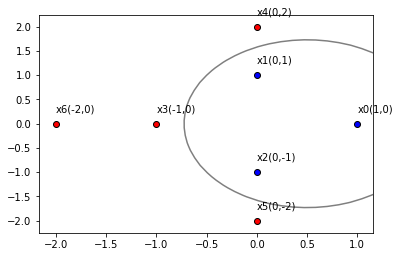

In [6]:
for i, j in enumerate(x):
    t1, t2 = j[0], j[1]
    coordinate = "x%d(%s,%s)\n" % (i, t1, t2)
    if y[i] == 1:
        plt.scatter(t1, t2, c='r', edgecolors='k')
        plt.annotate(coordinate, (t1,t2),  fontsize=10)
    elif y[i] == -1:
        plt.scatter(t1, t2, c='b', edgecolors='k')
        plt.annotate(coordinate, (t1,t2),  fontsize=10)

        
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
           linestyles=['-'])

plt.savefig('10.png')
plt.show()

In [19]:
def my_kernel2(x1, x2):
    return ((1 + 2 * np.dot(x1, x2.T))**2)*1000

In [20]:
# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel=my_kernel2, C=1000/2)
clf.fit(x, y)

SVC(C=500.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto',
  kernel=<function my_kernel2 at 0x7f75bf89b510>, max_iter=-1,
  probability=False, random_state=None, shrinking=True, tol=0.001,
  verbose=False)

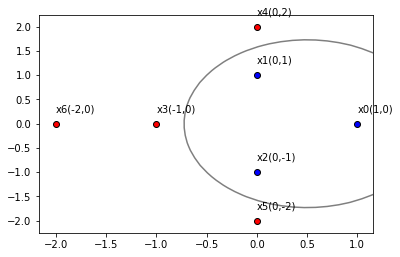

In [21]:
for i, j in enumerate(x):
    t1, t2 = j[0], j[1]
    coordinate = "x%d(%s,%s)\n" % (i, t1, t2)
    if y[i] == 1:
        plt.scatter(t1, t2, c='r', edgecolors='k')
        plt.annotate(coordinate, (t1,t2),  fontsize=10)
    elif y[i] == -1:
        plt.scatter(t1, t2, c='b', edgecolors='k')
        plt.annotate(coordinate, (t1,t2),  fontsize=10)

        
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
           linestyles=['-'])

plt.savefig('10.png')
plt.show()

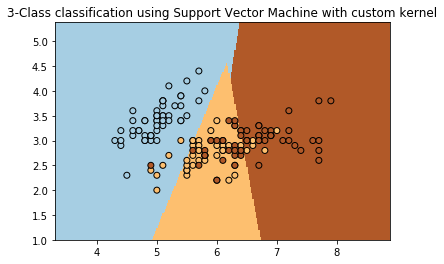

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
Y = iris.target


def my_kernel(X, Y):
    """
    We create a custom kernel:

                 (2  0)
    k(X, Y) = X  (    ) Y.T
                 (0  1)
    """
    M = np.array([[2, 0], [0, 1.0]])
    return np.dot(np.dot(X, M), Y.T)*0.002


h = .02  # step size in the mesh

# we create an instance of SVM and fit out data.
clf = svm.SVC(kernel=my_kernel, C=1)
clf.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('3-Class classification using Support Vector Machine with custom'
          ' kernel')
plt.axis('tight')
plt.show()